<a href="https://colab.research.google.com/github/BettySanchez7/AirDataMx/blob/main/Notebooks/MODULO%205/PerceptonMultiplica/DatosSO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Dense
import math

CARGAMOS LOS DATOS

In [2]:
url = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/CO_mensual.csv"
url2 ="https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/SO2_mensual.csv"
url3 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/PM10_mensual.csv"
url4 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/O3_mensual.csv"
url5 = "https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/NO2_mensual.csv"
df = pd.read_csv(url2,usecols=[1])
df2 = pd.read_csv(url2,usecols=[2])
df3 = pd.read_csv(url2,usecols=[3])
df4 = pd.read_csv(url2,usecols=[4])
df5 = pd.read_csv(url2,usecols=[5])

In [3]:
df = df.values
df = df.astype('float32')
df2 = df2.values
df2 = df2.astype('float32')
df3 = df3.values
df3 = df3.astype('float32')
df4 = df4.values
df4 = df4.astype('float32')
df5 = df5.values
df5 = df5.astype('float32')

In [4]:
#noreste_dioxido_de_azufre
train_size = int(len(df)*.67)
test_size = len(df) - train_size
train, test = df[0:train_size,:],df[train_size:len(df),:]
print(len(train),len(test))

128 64


In [5]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [6]:
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

Epoch 1/800
52/52 - 21s - loss: 13.2324
Epoch 2/800
52/52 - 0s - loss: 2.9971
Epoch 3/800
52/52 - 0s - loss: 2.7700
Epoch 4/800
52/52 - 0s - loss: 2.7251
Epoch 5/800
52/52 - 0s - loss: 2.5403
Epoch 6/800
52/52 - 0s - loss: 2.4744
Epoch 7/800
52/52 - 0s - loss: 2.2927
Epoch 8/800
52/52 - 0s - loss: 2.3130
Epoch 9/800
52/52 - 0s - loss: 2.5239
Epoch 10/800
52/52 - 0s - loss: 2.3044
Epoch 11/800
52/52 - 0s - loss: 2.2198
Epoch 12/800
52/52 - 0s - loss: 2.1978
Epoch 13/800
52/52 - 0s - loss: 2.2658
Epoch 14/800
52/52 - 0s - loss: 2.2853
Epoch 15/800
52/52 - 0s - loss: 2.1807
Epoch 16/800
52/52 - 0s - loss: 2.0820
Epoch 17/800
52/52 - 0s - loss: 2.1151
Epoch 18/800
52/52 - 0s - loss: 2.1430
Epoch 19/800
52/52 - 0s - loss: 1.9533
Epoch 20/800
52/52 - 0s - loss: 1.9889
Epoch 21/800
52/52 - 0s - loss: 1.9636
Epoch 22/800
52/52 - 0s - loss: 1.9870
Epoch 23/800
52/52 - 0s - loss: 2.0827
Epoch 24/800
52/52 - 0s - loss: 2.1799
Epoch 25/800
52/52 - 0s - loss: 1.9335
Epoch 26/800
52/52 - 0s - loss: 

In [8]:
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Resultado del entrenamiento: 0.01 MSE (0.10 RMSE)
Resultado del test: 15.54 MSE (3.94 RMSE)


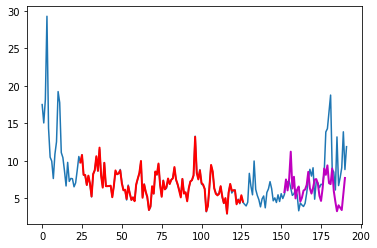

In [9]:
# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 3.2443
Epoch 2/800
52/52 - 0s - loss: 1.5591
Epoch 3/800
52/52 - 0s - loss: 1.4364
Epoch 4/800
52/52 - 0s - loss: 1.2350
Epoch 5/800
52/52 - 0s - loss: 1.3601
Epoch 6/800
52/52 - 0s - loss: 1.1409
Epoch 7/800
52/52 - 0s - loss: 1.0482
Epoch 8/800
52/52 - 0s - loss: 1.0182
Epoch 9/800
52/52 - 0s - loss: 0.9554
Epoch 10/800
52/52 - 0s - loss: 0.9872
Epoch 11/800
52/52 - 0s - loss: 1.0114
Epoch 12/800
52/52 - 0s - loss: 1.0544
Epoch 13/800
52/52 - 0s - loss: 1.0984
Epoch 14/800
52/52 - 0s - loss: 1.0371
Epoch 15/800
52/52 - 0s - loss: 0.9214
Epoch 16/800
52/52 - 0s - loss: 0.9127
Epoch 17/800
52/52 - 0s - loss: 0.8860
Epoch 18/800
52/52 - 0s - loss: 0.8444
Epoch 19/800
52/52 - 0s - loss: 0.8246
Epoch 20/800
52/52 - 0s - loss: 0.8240
Epoch 21/800
52/52 - 0s - loss: 0.8854
Epoch 22/800
52/52 - 0s - loss: 0.7987
Epoch 23/800
52/52 - 0s - loss: 0.7839
Epoch 24/800
52/52 - 0s - loss: 0.8863
Epoch 25/800
52/52 - 0s - loss: 0.8144
Epoch 26/800
52/52 - 0s - l

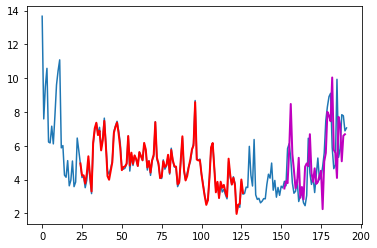

In [10]:
#	suroeste_dioxido_de_azufre
train_size = int(len(df2)*.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:],df2[train_size:len(df2),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df2)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 13.0190
Epoch 2/800
52/52 - 0s - loss: 4.8216
Epoch 3/800
52/52 - 0s - loss: 4.4058
Epoch 4/800
52/52 - 0s - loss: 4.1044
Epoch 5/800
52/52 - 0s - loss: 4.1888
Epoch 6/800
52/52 - 0s - loss: 3.6483
Epoch 7/800
52/52 - 0s - loss: 3.7785
Epoch 8/800
52/52 - 0s - loss: 3.5097
Epoch 9/800
52/52 - 0s - loss: 3.5364
Epoch 10/800
52/52 - 0s - loss: 3.5392
Epoch 11/800
52/52 - 0s - loss: 3.3092
Epoch 12/800
52/52 - 0s - loss: 3.2138
Epoch 13/800
52/52 - 0s - loss: 3.1610
Epoch 14/800
52/52 - 0s - loss: 3.5645
Epoch 15/800
52/52 - 0s - loss: 3.2571
Epoch 16/800
52/52 - 0s - loss: 2.8276
Epoch 17/800
52/52 - 0s - loss: 3.3554
Epoch 18/800
52/52 - 0s - loss: 2.9929
Epoch 19/800
52/52 - 0s - loss: 2.8747
Epoch 20/800
52/52 - 0s - loss: 3.1544
Epoch 21/800
52/52 - 0s - loss: 3.1861
Epoch 22/800
52/52 - 0s - loss: 3.1397
Epoch 23/800
52/52 - 0s - loss: 2.6915
Epoch 24/800
52/52 - 0s - loss: 2.7710
Epoch 25/800
52/52 - 0s - loss: 2.6666
Epoch 26/800
52/52 - 0s - 

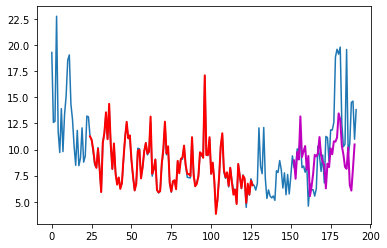

In [11]:
#	noroeste_dioxido_de_azufre
train_size = int(len(df3)*.67)
test_size = len(df3) - train_size
train, test = df3[0:train_size,:],df3[train_size:len(df3),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df3)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df3)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 2.4026
Epoch 2/800
52/52 - 0s - loss: 1.2444
Epoch 3/800
52/52 - 0s - loss: 1.0955
Epoch 4/800
52/52 - 0s - loss: 0.9707
Epoch 5/800
52/52 - 0s - loss: 1.0045
Epoch 6/800
52/52 - 0s - loss: 0.9646
Epoch 7/800
52/52 - 0s - loss: 0.9158
Epoch 8/800
52/52 - 0s - loss: 0.8370
Epoch 9/800
52/52 - 0s - loss: 0.8261
Epoch 10/800
52/52 - 0s - loss: 0.8133
Epoch 11/800
52/52 - 0s - loss: 0.8103
Epoch 12/800
52/52 - 0s - loss: 0.8198
Epoch 13/800
52/52 - 0s - loss: 0.7906
Epoch 14/800
52/52 - 0s - loss: 0.8819
Epoch 15/800
52/52 - 0s - loss: 0.7638
Epoch 16/800
52/52 - 0s - loss: 0.8176
Epoch 17/800
52/52 - 0s - loss: 0.7730
Epoch 18/800
52/52 - 0s - loss: 0.6735
Epoch 19/800
52/52 - 0s - loss: 0.7367
Epoch 20/800
52/52 - 0s - loss: 0.6946
Epoch 21/800
52/52 - 0s - loss: 0.8162
Epoch 22/800
52/52 - 0s - loss: 0.6983
Epoch 23/800
52/52 - 0s - loss: 0.7864
Epoch 24/800
52/52 - 0s - loss: 0.7985
Epoch 25/800
52/52 - 0s - loss: 0.6597
Epoch 26/800
52/52 - 0s - l

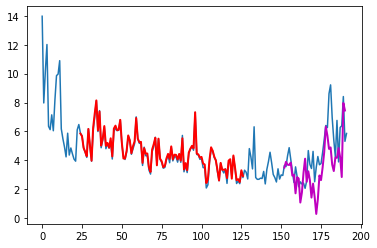

In [12]:
#sureste_dioxido_de_azufre
train_size = int(len(df4)*.67)
test_size = len(df4) - train_size
train, test = df4[0:train_size,:],df4[train_size:len(df4),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df4)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df4)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()

128 64
Epoch 1/800
52/52 - 1s - loss: 5.4981
Epoch 2/800
52/52 - 0s - loss: 2.0848
Epoch 3/800
52/52 - 0s - loss: 1.8930
Epoch 4/800
52/52 - 0s - loss: 1.7907
Epoch 5/800
52/52 - 0s - loss: 1.7346
Epoch 6/800
52/52 - 0s - loss: 1.7501
Epoch 7/800
52/52 - 0s - loss: 1.5407
Epoch 8/800
52/52 - 0s - loss: 1.4423
Epoch 9/800
52/52 - 0s - loss: 1.4437
Epoch 10/800
52/52 - 0s - loss: 1.4237
Epoch 11/800
52/52 - 0s - loss: 1.4068
Epoch 12/800
52/52 - 0s - loss: 1.3591
Epoch 13/800
52/52 - 0s - loss: 1.3087
Epoch 14/800
52/52 - 0s - loss: 1.3429
Epoch 15/800
52/52 - 0s - loss: 1.3036
Epoch 16/800
52/52 - 0s - loss: 1.2726
Epoch 17/800
52/52 - 0s - loss: 1.4734
Epoch 18/800
52/52 - 0s - loss: 1.2669
Epoch 19/800
52/52 - 0s - loss: 1.2014
Epoch 20/800
52/52 - 0s - loss: 1.2124
Epoch 21/800
52/52 - 0s - loss: 1.1976
Epoch 22/800
52/52 - 0s - loss: 1.1678
Epoch 23/800
52/52 - 0s - loss: 1.1970
Epoch 24/800
52/52 - 0s - loss: 1.1060
Epoch 25/800
52/52 - 0s - loss: 1.1801
Epoch 26/800
52/52 - 0s - l

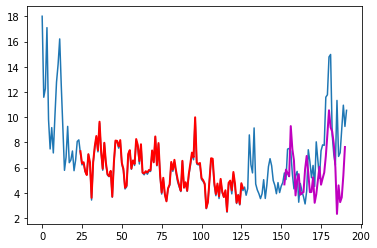

In [13]:
#centro_dioxido_de_azufre
train_size = int(len(df5)*.67)
test_size = len(df5) - train_size
train, test = df5[0:train_size,:],df5[train_size:len(df5),:]
print(len(train),len(test))

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

  look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(200, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=800, batch_size=2, verbose=2)

# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(df5)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = np.empty_like(df5)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df5)-1, :] = testPredict
# ploteamos la línea de base y las predicciones
plt.plot(df5)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.show()